In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from constants import timestamps
from HR_from_bvp import CZT

In [5]:
for idx, timestamp in enumerate(timestamps):

        t_start, t_end = timestamp[0], timestamp[-1]

        print(idx+1, ": ", t_start, t_end)

1 :  14 22
2 :  26 29
3 :  7 None
4 :  10 None
5 :  17 None
6 :  36 None
7 :  5 15
8 :  8 None
9 :  None None
10 :  None None
11 :  5 None
12 :  1 None
13 :  10 None
14 :  None None
15 :  12 None
16 :  None None
17 :  5 None
18 :  5 None


In [7]:
def cut_bvp(bvp, t_start, t_end, fs = 60):
    n_start = t_start * fs
    n_end = t_end * fs
    return bvp[n_start:n_end]

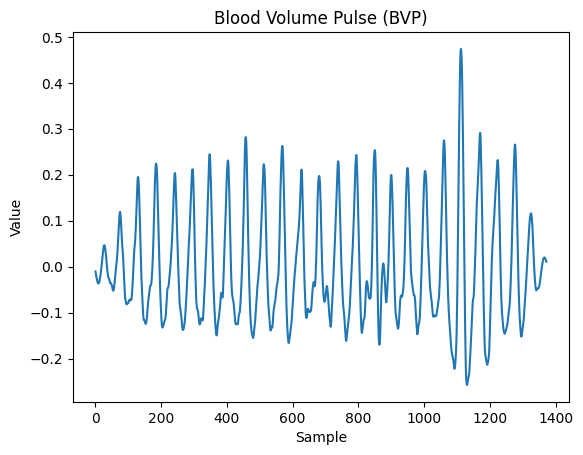

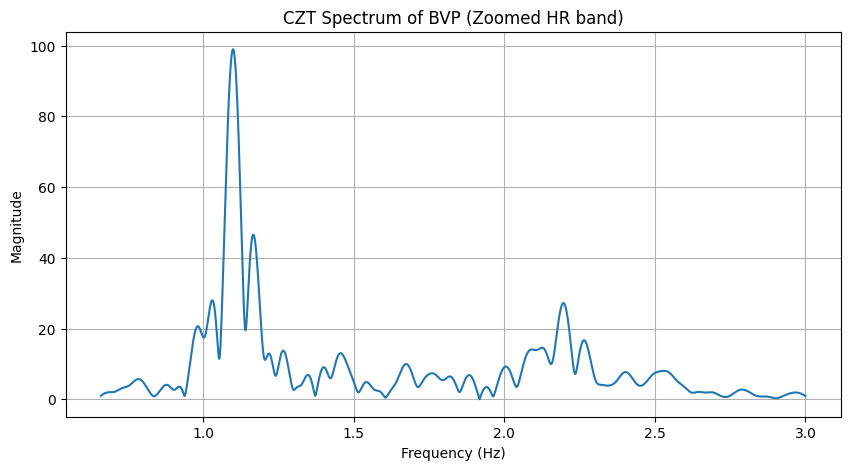

65.93142857142857


In [17]:
num = 39

bvp = np.load(f"BVPs/Patient_{num}/Q1_1.npy")
fs = 60

# Plot
plt.plot(bvp)
plt.title("Blood Volume Pulse (BVP)")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.show()

czt_power, czt_freqs = CZT(bvp, fs)

# ----- Plot -----
plt.figure(figsize=(10,5))
plt.plot(czt_freqs, czt_power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("CZT Spectrum of BVP (Zoomed HR band)")
plt.grid(True)
plt.show()

# 7 — Extract HR
peak_freq = czt_freqs[np.argmax(czt_power)]
hr_czt = peak_freq * 60
print(hr_czt)

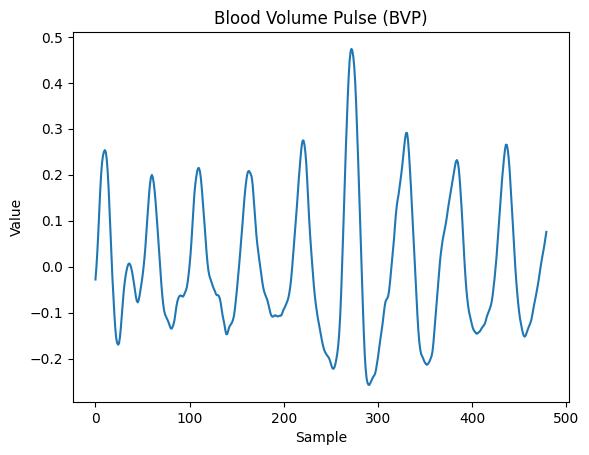

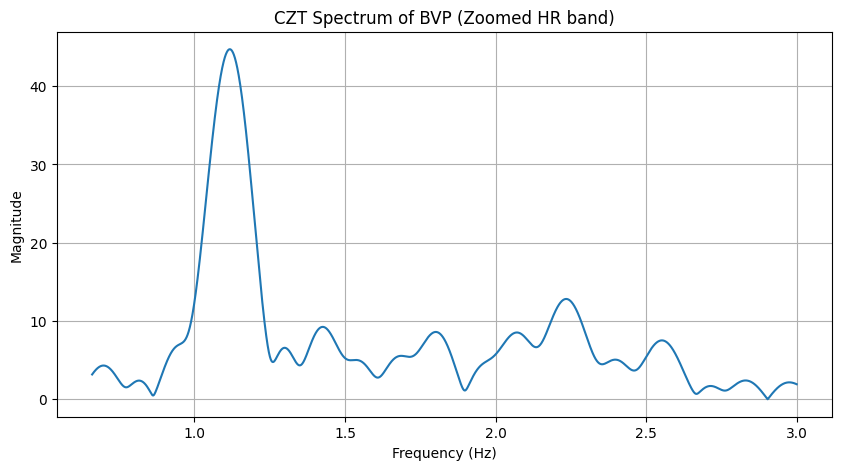

67.02857142857142


In [20]:
num = 39

bvp = np.load(f"BVPs/Patient_{num}/Q1_1.npy")
fs = 60

t_start, t_end = timestamps[0]
bvp_cut = cut_bvp(bvp, t_start, t_end)

# Plot
plt.plot(bvp_cut)
plt.title("Blood Volume Pulse (BVP)")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.show()

czt_power, czt_freqs = CZT(bvp_cut, fs)

# ----- Plot -----
plt.figure(figsize=(10,5))
plt.plot(czt_freqs, czt_power)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("CZT Spectrum of BVP (Zoomed HR band)")
plt.grid(True)
plt.show()

# 7 — Extract HR
peak_freq = czt_freqs[np.argmax(czt_power)]
hr_czt = peak_freq * 60
print(hr_czt)